Things learned: 

You should activate a conda environment before working in the jupyter notebook. This will help ensure the correct versions of packages are being used between anaconda and python. Good practice to activate anaconda environment for each project you work on. 

In [1]:
from platform import python_version


print(python_version())

3.10.9


dataset from [here](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection) and stored the data locally. Data is also available on github as the storage size on git allows for it. 

Using this dataset as practice as the images are of different dimensions, similar to another project im working on for a business. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # good for separating RGB properties of an image. 
import glob

In [3]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 77B6-1F68

 Directory of C:\Users\Rudol\0_Github\Brain MRI Data\Brain-MRI-Image-Classifier

26/09/2023  03:32 PM    <DIR>          .
26/09/2023  03:32 PM    <DIR>          ..
25/09/2023  09:30 PM    <DIR>          .ipynb_checkpoints
26/09/2023  03:32 PM         1,389,410 Brain_MRI.ipynb
26/09/2023  03:32 PM         1,624,519 brain_mri_tensors.ipynb
20/07/2023  09:04 PM    <DIR>          dataset
27/08/2023  11:12 PM    <DIR>          logs
               2 File(s)      3,013,929 bytes
               5 Dir(s)  705,094,340,608 bytes free


# Reading a single image

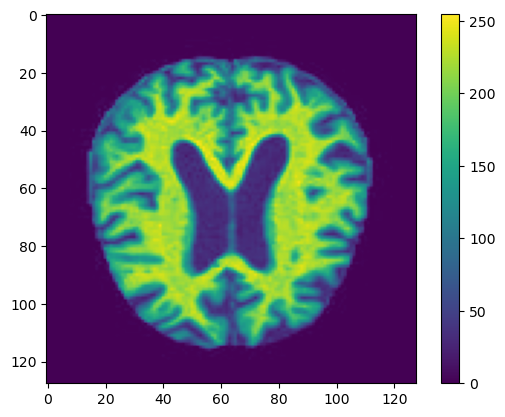

In [5]:
from PIL import Image

image = Image.open('./dataset/Mild_Demented/mild.jpg')
plt.imshow(image)
plt.colorbar()

# Reading multiple images

In [6]:
data_path = './dataset/'
demented_type = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented'] #should leard how to extract this with code


for folder in demented_type:
    file_name = glob.glob(data_path + folder + '*.jpg')
    

In [7]:
data_path = './dataset/'

mild = [] 
very_mild = []
healthy = [] 
moderate = []

for i in glob.glob(data_path + 'Mild_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128)) 
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    mild.append(image)


for i in glob.glob(data_path + 'Very_Mild_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    very_mild.append(image)

for i in glob.glob(data_path + 'Non_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    healthy.append(image)

for i in glob.glob(data_path + 'Moderate_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    moderate.append(image)


In [8]:
len(very_mild)

2240

In [9]:
mild = np.array(mild)
mild.shape # cannot do this with lists. 

(896, 128, 128, 3)

In [10]:
very_mild = np.array(very_mild)

moderate = np.array(moderate)

healthy = np.array(healthy)

In [11]:
all_types = np.concatenate((mild, very_mild, moderate, healthy))

In [12]:
all_types.shape # all images combined into one dimension. the first dimension is the sum of all the demented types

(6400, 128, 128, 3)

# Visualisation

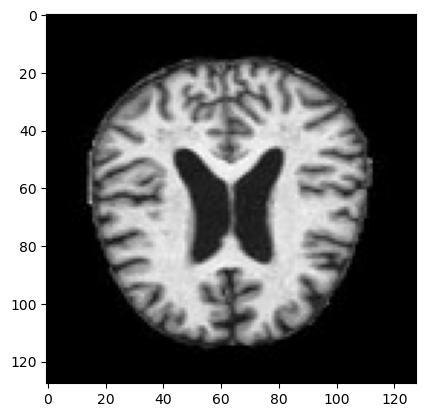

In [13]:
plt.imshow(very_mild[0])

In [14]:
def plot_random(mild, very_mild, moderate, healthy, num= 3):
    mild_images = mild[np.random.choice(mild.shape[0], num, replace = False)]
    very_mild_images = very_mild[np.random.choice(very_mild.shape[0], num, replace = False)]
    moderate_images = moderate[np.random.choice(moderate.shape[0], num, replace = False)]
    healthy_images = healthy[np.random.choice(healthy.shape[0], num, replace = False)]
    
    plt.figure(figsize = (16, 9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('healthy')
        plt.imshow(healthy_images[i])
    
    plt.figure(figsize = (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('very_mild')
        plt.imshow(very_mild[i])
        
    plt.figure(figsize = (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('mild')
        plt.imshow(mild_images[i])
        
    plt.figure(figsize= (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('moderate')
        plt.imshow(moderate_images[i])

Above is not very efficient, can reduce the number of 'for loops', however this is just for demonstration purposes. 

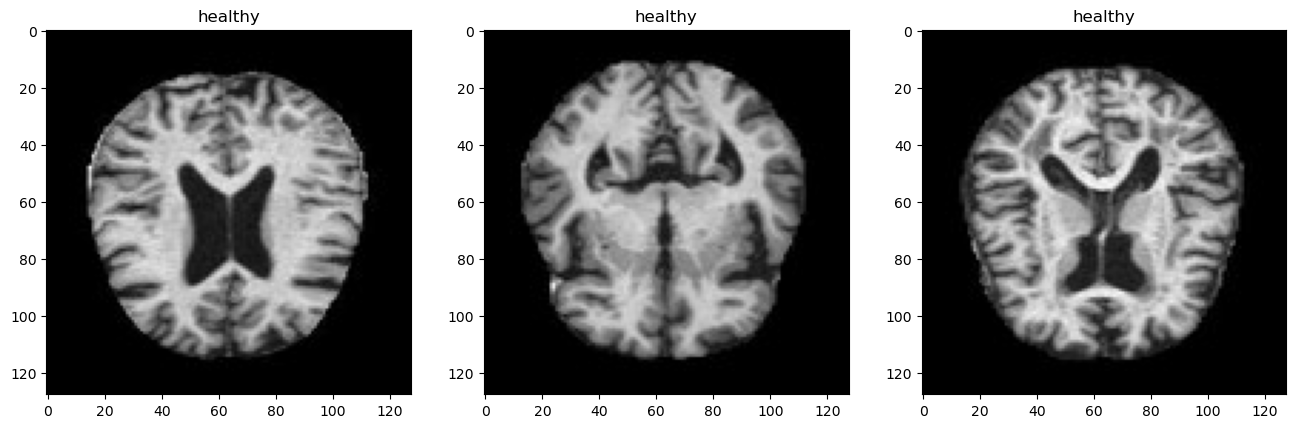

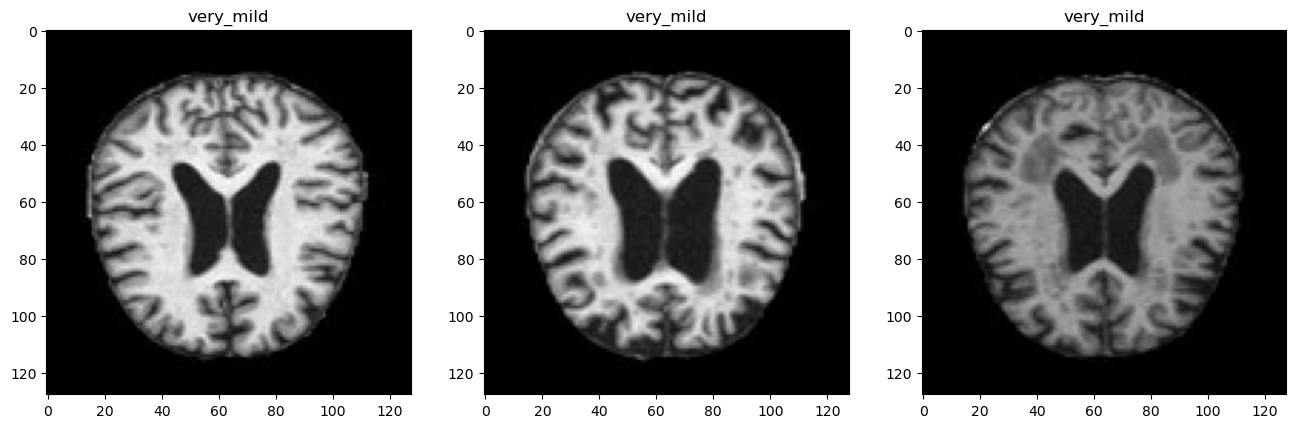

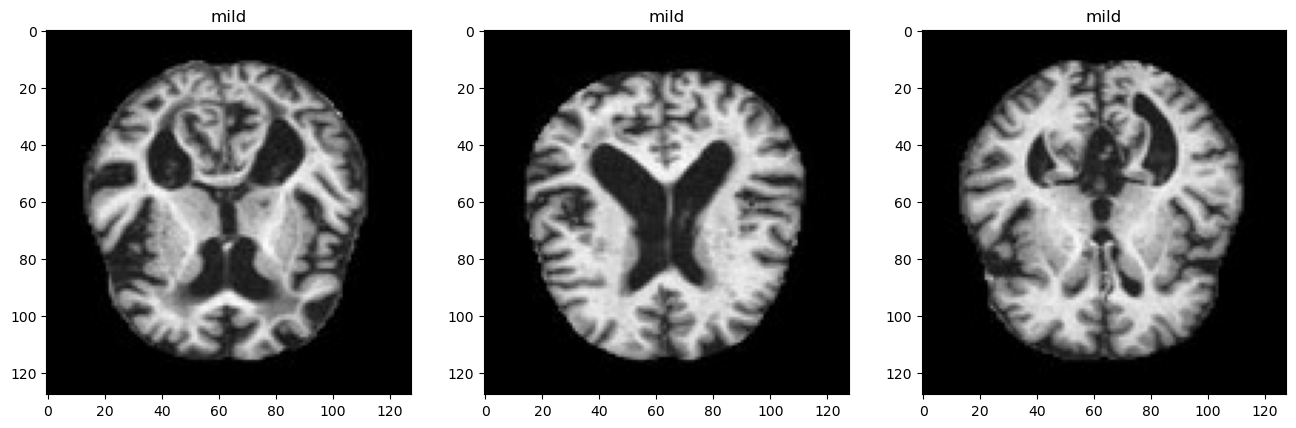

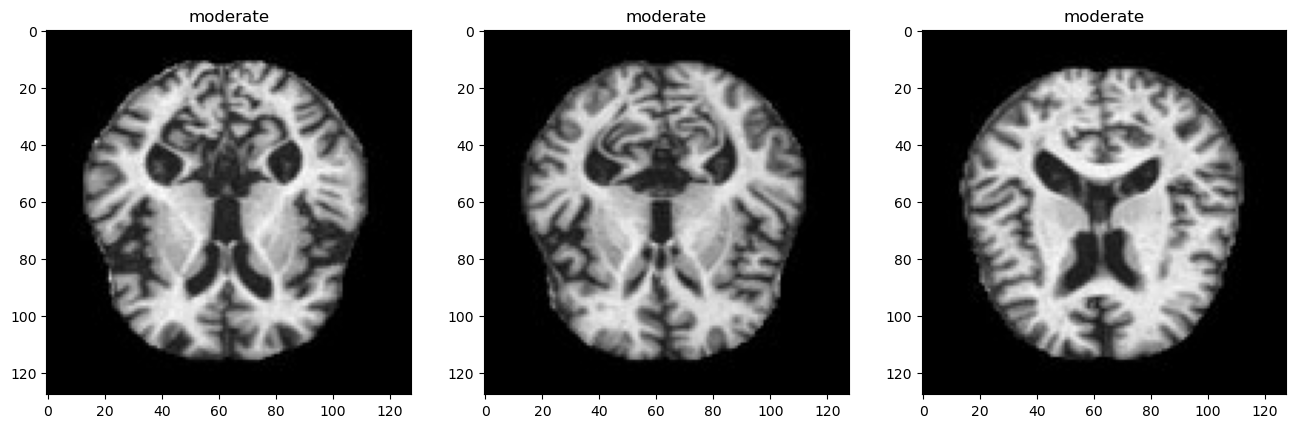

In [15]:
plot_random(mild, very_mild, moderate, healthy)

# Data preparation (with tensors)

## Normalisation

Normalisation is crucial for deep learning. We want to modify the data so that the mean is zero and the standard deviation is one. Therefore ranging between -1 and 1. We do this for including the data in the same range as the activation function for the model. This will allow for less frequent non-zero gradients during training, allowing the neurons in the network to learn faster. Normalising also ensures the channel information can be mixed and updated during the gradient descent (back propagation_ using the same learning rate. 

### Pytorch normalisation

In [16]:
!pip install torch
!pip install torchvision

In [17]:
import torch

The images need to be tensors

In [18]:
from torchvision import transforms

C:\Users\Rudol\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Converting from an image to a tensor

In [19]:
mild.shape

(896, 128, 128, 3)

In [20]:
convert_tensor = transforms.ToTensor()
single_mild = convert_tensor(mild[0])

In [21]:
single_mild

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

Checking we can still display the image

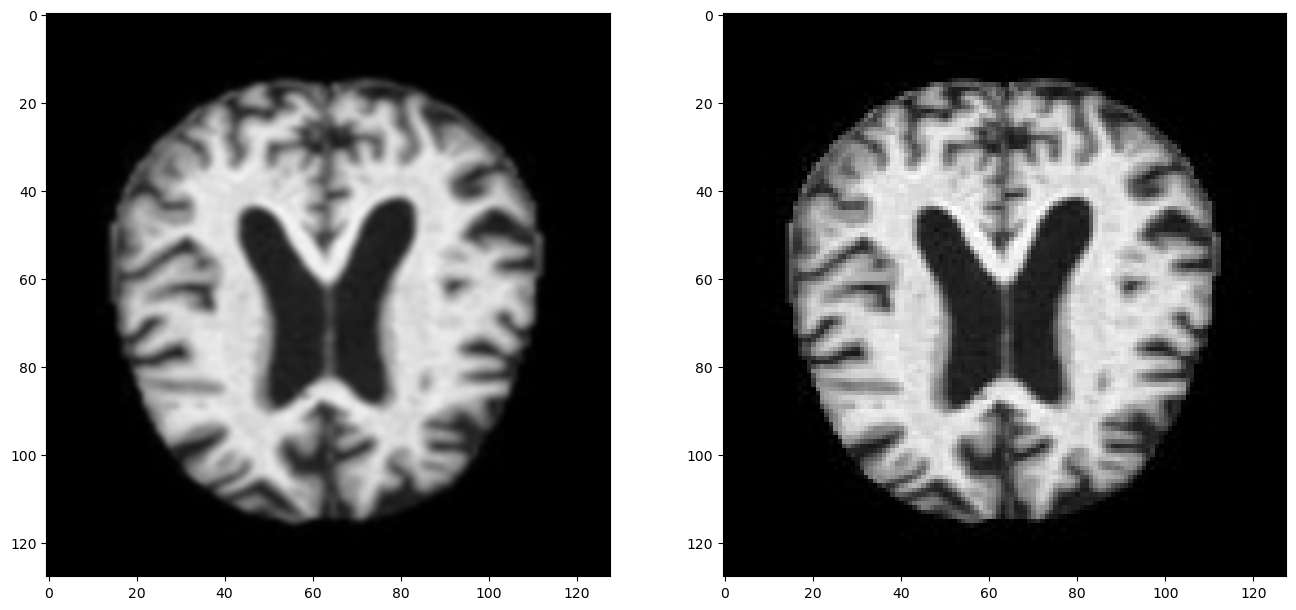

In [22]:
plt.figure(figsize = (16,9))
plt.subplot(121)
plt.imshow(transforms.ToPILImage()(single_mild), interpolation="bicubic")

plt.subplot(122)
plt.imshow(mild[0])

Notice the image that was transformed twice is a little blurry. 

the stack function requires a tuple of tensors, so we can't feed it a single image.

In [23]:
convert_tensor = transforms.ToTensor()

# Using a lambda function

mild_tensors = [convert_tensor(image) for image in mild]
very_mild_tensors = [convert_tensor(image) for image in very_mild]
moderate_tensors = [convert_tensor(image) for image in moderate]
healthy_tensors = [convert_tensor(image) for image in healthy]

As this provides a list of tensors, we can make it a single tensor, which allows for a more efficient model. The model will be able to distinguish between the separate images even if it's a single tensor. 

In [24]:
mild_tensor = torch.stack(mild_tensors)
very_mild_tensor = torch.stack(very_mild_tensors)
moderate_tensor = torch.stack(moderate_tensors)
healthy_tensor = torch.stack(healthy_tensors)

In [25]:
mild_tensor.shape

torch.Size([896, 3, 128, 128])

Getting the mean for each channel (RGB)

In [26]:
mild_tensor.view(3, -1).mean(dim=1)

tensor([0.2635, 0.2634, 0.2578])

In [27]:
mild_tensor.view(3, -1).std(dim = 1)

tensor([0.3152, 0.3111, 0.3162])

We can now use Pytorch's normalisation function from the transform module

In [28]:
norm =  transforms.Normalize(mild_tensor.view(3, -1).mean(dim=1), mild_tensor.view(3, -1).std(dim = 1))
mild_norm = norm(mild_tensor)

norm =  transforms.Normalize(very_mild_tensor.view(3, -1).mean(dim=1), very_mild_tensor.view(3, -1).std(dim = 1))
very_mild_norm = norm(very_mild_tensor)

norm =  transforms.Normalize(moderate_tensor.view(3, -1).mean(dim=1), moderate_tensor.view(3, -1).std(dim = 1))
moderate_norm = norm(moderate_tensor)

norm =  transforms.Normalize(healthy_tensor.view(3, -1).mean(dim=1), healthy_tensor.view(3, -1).std(dim = 1))
healthy_norm = norm(healthy_tensor)

In [29]:
print(mild_norm.mean(), mild_norm.std())

tensor(-3.9122e-05) tensor(1.0002)


We want 0 and 1 however there may have been rounding errors in the data distribution. We don't want to further round the mean and std as this may introduce precision errors in the future.

## Flattening

Flattening is useful for fully connected networks with dense layers. These networks usually expect 1D input while we currently have 3D. 

Convolutional neural networks can work with 3D tensors directly. CNN is designed to process spatial information in the data. 

Depending on the network used, it will advise whether to flatten. Also important to know the difference between reshaping and flattening. 

Good to experiment with different models to gauge performance with flattenned vs unflattened.

In [30]:
mild_flat = [] 

for i, val in enumerate(mild_norm):
    mild_flat.append(mild_norm[i].flatten())
    
very_mild_flat = [] 

for i, val in enumerate(very_mild_norm):
    very_mild_flat.append(very_mild_norm[i].flatten())
    
moderate_flat = [] 

for i, val in enumerate(moderate_norm):
    moderate_flat.append(moderate_norm[i].flatten())
    
healthy_flat = [] 

for i, val in enumerate(healthy_norm):
    healthy_flat.append(healthy_norm[i].flatten())

In [31]:
type(mild_flat)

list

In [32]:
all_flat = []

all_flat = mild_flat + very_mild_flat + moderate_flat + healthy_flat
all_flat = torch.stack(all_flat)

print(all_flat.shape)

torch.Size([6400, 49152])


## 1D vector of labels

In [33]:
def globFn(demented_type: str):
    #stores the file names in a list
    fitsFileNames = glob.glob(data_path + demented_type +'/*.jpg') # Where the asterisk symbol acts as a wildcard
    return fitsFileNames

In [34]:
#creating the labels
mild_filenames = globFn('Mild_Demented')
very_mild_filenames = globFn('Very_Mild_Demented')
moderate_filenames = globFn('Moderate_Demented')
healthy_filenames = globFn('Non_Demented')

#we want to now binarize these labels so that we can use them in our `trainTestSplitFn`
mild_filenames[0:10]

['./dataset/Mild_Demented\\mild.jpg',
 './dataset/Mild_Demented\\mild_10.jpg',
 './dataset/Mild_Demented\\mild_100.jpg',
 './dataset/Mild_Demented\\mild_101.jpg',
 './dataset/Mild_Demented\\mild_102.jpg',
 './dataset/Mild_Demented\\mild_103.jpg',
 './dataset/Mild_Demented\\mild_104.jpg',
 './dataset/Mild_Demented\\mild_105.jpg',
 './dataset/Mild_Demented\\mild_106.jpg',
 './dataset/Mild_Demented\\mild_107.jpg']

In [35]:
len(mild_filenames)

896

In [36]:
demented_type

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

In [37]:
demented_type_dict = {demented_type[0]: 'mild', demented_type[1]: 'moderate', 
                      demented_type[2]: 'healthy', demented_type[3]: 'very_mild'}

In [38]:
all_filenames = np.concatenate((mild_filenames, very_mild_filenames, 
                                moderate_filenames, healthy_filenames))
all_filenames.shape

(6400,)

In [39]:
all_filenames

array(['./dataset/Mild_Demented\\mild.jpg',
       './dataset/Mild_Demented\\mild_10.jpg',
       './dataset/Mild_Demented\\mild_100.jpg', ...,
       './dataset/Non_Demented\\non_997.jpg',
       './dataset/Non_Demented\\non_998.jpg',
       './dataset/Non_Demented\\non_999.jpg'], dtype='<U46')

In [40]:
for i in demented_type_dict:
    print(i)

Mild_Demented
Moderate_Demented
Non_Demented
Very_Mild_Demented


In [41]:
mild_filenames
very_mild_filenames
moderate_filenames
healthy_filenames

['./dataset/Non_Demented\\non.jpg',
 './dataset/Non_Demented\\non_10.jpg',
 './dataset/Non_Demented\\non_100.jpg',
 './dataset/Non_Demented\\non_1000.jpg',
 './dataset/Non_Demented\\non_1001.jpg',
 './dataset/Non_Demented\\non_1002.jpg',
 './dataset/Non_Demented\\non_1003.jpg',
 './dataset/Non_Demented\\non_1004.jpg',
 './dataset/Non_Demented\\non_1005.jpg',
 './dataset/Non_Demented\\non_1006.jpg',
 './dataset/Non_Demented\\non_1007.jpg',
 './dataset/Non_Demented\\non_1008.jpg',
 './dataset/Non_Demented\\non_1009.jpg',
 './dataset/Non_Demented\\non_101.jpg',
 './dataset/Non_Demented\\non_1010.jpg',
 './dataset/Non_Demented\\non_1011.jpg',
 './dataset/Non_Demented\\non_1012.jpg',
 './dataset/Non_Demented\\non_1013.jpg',
 './dataset/Non_Demented\\non_1014.jpg',
 './dataset/Non_Demented\\non_1015.jpg',
 './dataset/Non_Demented\\non_1016.jpg',
 './dataset/Non_Demented\\non_1017.jpg',
 './dataset/Non_Demented\\non_1018.jpg',
 './dataset/Non_Demented\\non_1019.jpg',
 './dataset/Non_Demented\

In [42]:
labels = []

for filename in mild_filenames:
    labels.append(0)

for filename in very_mild_filenames:
    labels.append(1)

for filename in moderate_filenames:
    labels.append(2)

for filename in healthy_filenames:
    labels.append(3)

labels = np.array(labels)
print(labels.shape)

(6400,)


In [43]:
demented_type_dict = {0: 'mild', 2: 'moderate_mild', 
                      3: 'healthy', 1: 'very_mild'}

Problem with the above is the loop sees 'Mild_demented twice, thus adding more number of labels. 

Checking that there is 4 labels

In [44]:
np.unique(labels)

array([0, 1, 2, 3])

In [45]:
print(mild_norm.shape)

torch.Size([896, 3, 128, 128])


In [46]:
mild.shape

(896, 128, 128, 3)

In [47]:
all_flat

tensor([[-0.8358, -0.8358, -0.8358,  ..., -0.8151, -0.8151, -0.8151],
        [-0.8358, -0.8358, -0.8358,  ..., -0.8151, -0.8151, -0.8151],
        [-0.8358, -0.8358, -0.8358,  ..., -0.8151, -0.8151, -0.8151],
        ...,
        [-0.8855, -0.8855, -0.8855,  ..., -0.8499, -0.8499, -0.8499],
        [-0.8855, -0.8855, -0.8855,  ..., -0.8499, -0.8499, -0.8499],
        [-0.8855, -0.8855, -0.8855,  ..., -0.8499, -0.8499, -0.8499]])

In [48]:
from sklearn.model_selection import train_test_split

#splitting the DF with the split function
train_set, test_set, train_labels, test_labels= train_test_split(all_flat, labels, stratify= labels, test_size= 0.3, random_state= 42)

In [49]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer() #sets the function to a variable, less writing.

#converting our labels which contain 0,1,2 into one-hot vector format which is required for the binarizor function
train_labels = lb.fit_transform(train_labels)
test_labels = lb.transform(test_labels) 

print('train_labels shape: ', train_labels.shape, 'and test_labels shape: ', test_labels.shape)

train_labels shape:  (4480, 4) and test_labels shape:  (1920, 4)


In [50]:
test_labels[0:10]

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

# Artificial Neural Networks

Converting the Pytorch tensors to Tensorflow tensors

## first model attempt (with tensors)

In [51]:
!pip install --upgrade tensorflow==2.3.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.0 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.14.0rc0, 2.14.0rc1)
ERROR: No matching distribution found for tensorflow==2.3.0


In [52]:
pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\rudol\anaconda3\lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [53]:
import tensorflow as tf
import numpy as np

# Assuming you have numpy arrays: train_set, train_labels, test_set, test_labels

# Convert NumPy arrays to TensorFlow tensors
train_set_tf = tf.convert_to_tensor(train_set, dtype=tf.float32)
train_labels_tf = tf.convert_to_tensor(train_labels, dtype=tf.float32)
test_set_tf = tf.convert_to_tensor(test_set, dtype=tf.float32)
test_labels_tf = tf.convert_to_tensor(test_labels, dtype=tf.float32)

In [54]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [55]:
import tensorflow as tf
print("GPU available:", tf.config.list_physical_devices())

GPU available: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [56]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir="./logs", histogram_freq=1)

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report

print("TensorFlow version:", tf.__version__)

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(256, input_shape=(49152,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(4, activation="softmax"))

# Define optimizer
learnRate = 0.01
opt = SGD(learning_rate=learnRate, momentum=0.9)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Number of runs the model does
epochs = 100

# Applying the data to the model
H = model.fit(train_set_tf, train_labels_tf, validation_data=(test_set_tf, test_labels_tf),
          epochs=epochs, batch_size=64, verbose=1, callbacks=[tensorboard_callback])

# Applying the model to all the test data to check how well it's performed
predictionsANN = model.predict(test_set_tf)

TensorFlow version: 2.13.0
Epoch 1/100
70/70 [==============================] - 6s 77ms/step - loss: 0.9868 - accuracy: 0.5400 - val_loss: 0.9194 - val_accuracy: 0.5833
Epoch 2/100
70/70 [==============================] - 5s 66ms/step - loss: 0.8211 - accuracy: 0.6422 - val_loss: 0.7692 - val_accuracy: 0.6964
Epoch 3/100
70/70 [==============================] - 5s 69ms/step - loss: 0.7507 - accuracy: 0.6810 - val_loss: 0.6746 - val_accuracy: 0.7312
Epoch 4/100
70/70 [==============================] - 5s 70ms/step - loss: 0.6328 - accuracy: 0.7592 - val_loss: 0.5633 - val_accuracy: 0.8177
Epoch 5/100
70/70 [==============================] - 5s 71ms/step - loss: 0.6001 - accuracy: 0.7862 - val_loss: 0.5823 - val_accuracy: 0.8047
Epoch 6/100
70/70 [==============================] - 5s 68ms/step - loss: 0.6344 - accuracy: 0.7699 - val_loss: 0.6581 - val_accuracy: 0.8021
Epoch 7/100
70/70 [==============================] - 5s 70ms/step - loss: 0.7296 - accuracy: 0.7125 - val_loss: 0.8499 - 

In [58]:
from sklearn.metrics import classification_report
print(tf.__version__)

2.13.0


In [59]:
from sklearn.metrics import classification_report

# Convert EagerTensor to a NumPy array
test_labels_np = test_labels_tf.numpy()

# Print a formatted report
print(classification_report(
    test_labels_np.argmax(axis=1), 
    predictionsANN.argmax(axis=1), 
    target_names=[str(x) for x in lb.classes_]
))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       269
           1       0.00      0.00      0.00       672
           2       0.00      0.00      0.00        19
           3       0.50      1.00      0.67       960

    accuracy                           0.50      1920
   macro avg       0.12      0.25      0.17      1920
weighted avg       0.25      0.50      0.33      1920



C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Imbalanced Classes: If you have imbalanced classes (some classes have very few samples), consider oversampling or undersampling techniques to balance the dataset. This can improve the performance metrics for these classes.

Checking which label has least amount of images

In [60]:
print(len(mild_filenames))
print(len(very_mild_filenames))
print(len(moderate_filenames))
print(len(healthy_filenames))

896
2240
64
3200


## adding class weights

In [61]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder

# Convert one-hot encoded vectors to class indices
train_labels_indices = np.argmax(train_labels, axis=1)

# Use LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels_indices)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels_encoded), y=train_labels_encoded)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

In [62]:
# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(256, input_shape=(49152,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(4, activation="softmax"))

# Define optimizer
learnRate = 0.01
opt = SGD(learning_rate=learnRate, momentum=0.9)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Number of runs the model does
epochs = 100

# Applying the data to the model
H = model.fit(train_set_tf, train_labels_tf, validation_data=(test_set_tf, test_labels_tf),
          epochs=epochs, batch_size=64, verbose=1, callbacks=[tensorboard_callback], class_weight=class_weights_dict)

# Applying the model to all the test data to check how well it's performed
predictionsANN = model.predict(test_set_tf)

Epoch 1/100
70/70 [==============================] - 5s 72ms/step - loss: 1.4278 - accuracy: 0.2846 - val_loss: 1.2790 - val_accuracy: 0.2833
Epoch 2/100
70/70 [==============================] - 5s 74ms/step - loss: 1.3260 - accuracy: 0.3987 - val_loss: 1.5560 - val_accuracy: 0.0542
Epoch 3/100
70/70 [==============================] - 5s 73ms/step - loss: 1.3289 - accuracy: 0.3605 - val_loss: 1.1720 - val_accuracy: 0.4880
Epoch 4/100
70/70 [==============================] - 5s 72ms/step - loss: 1.3696 - accuracy: 0.3393 - val_loss: 1.1685 - val_accuracy: 0.5474
Epoch 5/100
70/70 [==============================] - 5s 72ms/step - loss: 1.3774 - accuracy: 0.3136 - val_loss: 1.2646 - val_accuracy: 0.3516
Epoch 6/100
70/70 [==============================] - 5s 72ms/step - loss: 1.3821 - accuracy: 0.2734 - val_loss: 1.6075 - val_accuracy: 0.0099
Epoch 7/100
70/70 [==============================] - 5s 72ms/step - loss: 1.3769 - accuracy: 0.2788 - val_loss: 1.3843 - val_accuracy: 0.2229
Epoch 

In [63]:
# Convert EagerTensor to a NumPy array
test_labels_np = test_labels_tf.numpy()

# Print a formatted report
print(classification_report(
    test_labels_np.argmax(axis=1), 
    predictionsANN.argmax(axis=1), 
    target_names=[str(x) for x in lb.classes_]
))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       269
           1       0.00      0.00      0.00       672
           2       0.01      1.00      0.02        19
           3       0.00      0.00      0.00       960

    accuracy                           0.01      1920
   macro avg       0.00      0.25      0.00      1920
weighted avg       0.00      0.01      0.00      1920



C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Data Augmentation

Augmenting the moderate class a number of times based off the performance of the model. I believe the images can only have a certain amount of augmentation before being inaccurate. With each number of augmentations we will gauge the performance of the model to see how it has been affected. It is recommended to exercise caution when applying aggressive data augmentation techniques. The augmentations should be done in consultation with medical professionals to ensure the changes made are consisten with clinical context.

Afterwards, we will check if adding weights will help.

## 10 augmentations

Performing conservative augmentations